# Predicting success of Bank Telemarketing Calls: Implementing and Comparing various ML classification algorithms

### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

In [1]:
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Exploratory Data Analysis 

In [2]:
df_baf=pd.read_csv('/home/atul/bank-additional/bank-additional-full.csv',sep=';')
df_baf.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_baf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
profile = pp.ProfileReport(df_baf)
profile.to_file("bank-additional-full-profileoutput_ydupl.html")
profile

In [5]:
df_bafd=df_baf.drop(['euribor3m','nr.employed'],axis=1) #dropping correlated features
df_bafd.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,no


# Applying Logistic Regression


## 1. Converting Categorical Data to numerical

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_bafd, test_size=0.2)
train.shape,test.shape

((32950, 19), (8238, 19))

In [7]:
c1=train.iloc[:,1:10] #first set of categorical variables
c1.head(5) 

,job,marital,education,default,housing,loan,contact,month,day_of_week
16799,services,married,high.school,unknown,no,yes,cellular,jul,thu
12182,retired,married,basic.4y,no,no,no,telephone,jul,tue
17360,admin.,divorced,university.degree,no,no,no,cellular,jul,mon
5358,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri
38806,admin.,single,university.degree,no,no,no,cellular,nov,fri


In [8]:
c2=train.iloc[:,14:15] #second set of categorical variable
c2.head(5) 

,poutcome
16799,nonexistent
12182,nonexistent
17360,nonexistent
5358,nonexistent
38806,success


In [9]:
c1 = c1.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week
16799,7,1,3,1,0,2,0,3,2
12182,5,1,0,0,0,0,1,3,3
17360,0,0,6,0,0,0,0,3,1
5358,1,1,2,1,0,0,1,6,0
38806,0,2,6,0,0,0,0,7,0


In [10]:
c2 = c2.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c2.head()

,poutcome
16799,1
12182,1
17360,1
5358,1
38806,2


In [11]:
c3=train.iloc[:,-1:] #predicted variable
c3.head()

,y
16799,no
12182,no
17360,no
5358,no
38806,yes


In [12]:
c3=c3.astype('category').apply(lambda x: x.cat.codes) #converting to numeric
c3.head()

,y
16799,0
12182,0
17360,0
5358,0
38806,1


In [13]:
train_num=pd.concat([train.iloc[:,0:1],c1,train.iloc[:,10:14],c2,train.iloc[:,15:18],c3],axis=1)
train_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
16799,54,7,1,3,1,0,2,0,3,2,338,1,999,0,1,1.4,93.918,-42.7,0
12182,47,5,1,0,0,0,0,1,3,3,484,1,999,0,1,1.4,93.918,-42.7,0
17360,51,0,0,6,0,0,0,0,3,1,117,3,999,0,1,1.4,93.918,-42.7,0
5358,51,1,1,2,1,0,0,1,6,0,304,2,999,0,1,1.1,93.994,-36.4,0
38806,29,0,2,6,0,0,0,0,7,0,122,1,3,2,2,-3.4,92.649,-30.1,1


In [14]:
c1t=test.iloc[:,1:10] #first set of categorical variables test
c1t.head(5) 

,job,marital,education,default,housing,loan,contact,month,day_of_week
27257,services,married,high.school,unknown,yes,no,cellular,nov,fri
11742,technician,single,professional.course,no,no,yes,telephone,jun,fri
10889,technician,married,professional.course,no,no,no,telephone,jun,wed
16359,blue-collar,married,basic.4y,unknown,no,no,cellular,jul,wed
24576,technician,married,basic.9y,no,no,no,cellular,nov,mon


In [15]:
c2t=test.iloc[:,14:15] #second set of categorical variable test
c2t.head(5) 

,poutcome
27257,nonexistent
11742,nonexistent
10889,nonexistent
16359,nonexistent
24576,nonexistent


In [16]:
c1t = c1t.astype('category').apply(lambda x: x.cat.codes) #converting to numerical
c1t.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week
27257,7,1,3,1,2,0,0,7,0
11742,9,2,5,0,0,2,1,4,0
10889,9,1,5,0,0,0,1,4,4
16359,1,1,0,1,0,0,0,3,4
24576,9,1,2,0,0,0,0,7,1


In [17]:
c2t = c2t.astype('category').apply(lambda x: x.cat.codes) #converting to numerical test
c2t.head()

,poutcome
27257,1
11742,1
10889,1
16359,1
24576,1


In [18]:
ytest=test.iloc[:,-1:] #predicted variable of test
ytest.head()

,y
27257,no
11742,no
10889,no
16359,no
24576,no


In [19]:
ytest_num = ytest.astype('category').apply(lambda x: x.cat.codes) #converting to numerical test
ytest_num.head()

,y
27257,0
11742,0
10889,0
16359,0
24576,0


In [20]:
test_num=pd.concat([test.iloc[:,0:1],c1t,test.iloc[:,10:14],c2t,test.iloc[:,15:18]],axis=1)
test_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
27257,56,7,1,3,1,2,0,0,7,0,72,1,999,0,1,-0.1,93.200,-42.0
11742,33,9,2,5,0,0,2,1,4,0,241,3,999,0,1,1.4,94.465,-41.8
10889,35,9,1,5,0,0,0,1,4,4,417,1,999,0,1,1.4,94.465,-41.8
16359,44,1,1,0,1,0,0,0,3,4,71,3,999,0,1,1.4,93.918,-42.7
24576,42,9,1,2,0,0,0,0,7,1,295,1,999,0,1,-0.1,93.200,-42.0


## 2. Generating Model from Training Data

In [21]:
trd=train_num.iloc[:,:].T #train data
trd

,16799,12182,17360,5358,38806,19171,35752,36436,40217,35111,...,2931,34153,11733,10845,37000,33869,37476,38783,28943,5676
age,54.000,47.000,51.000,51.000,29.000,46.000,22.000,37.000,23.000,36.000,...,36.000,34.000,60.000,34.000,34.000,27.000,45.000,78.000,50.000,58.000
job,7.000,5.000,0.000,1.000,0.000,3.000,9.000,0.000,0.000,4.000,...,1.000,1.000,6.000,0.000,0.000,0.000,0.000,5.000,4.000,4.000
marital,1.000,1.000,0.000,1.000,2.000,1.000,2.000,1.000,2.000,1.000,...,1.000,1.000,2.000,1.000,1.000,2.000,0.000,0.000,1.000,1.000
education,3.000,0.000,6.000,2.000,6.000,2.000,2.000,6.000,6.000,6.000,...,2.000,1.000,2.000,6.000,3.000,3.000,6.000,0.000,1.000,6.000
default,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
housing,0.000,0.000,0.000,0.000,0.000,2.000,0.000,2.000,2.000,0.000,...,2.000,2.000,2.000,2.000,0.000,0.000,2.000,2.000,2.000,0.000
loan,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
contact,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,...,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000
month,3.000,3.000,3.000,6.000,7.000,1.000,6.000,4.000,3.000,6.000,...,6.000,6.000,4.000,4.000,3.000,6.000,1.000,7.000,0.000,6.000
day_of_week,2.000,3.000,1.000,0.000,0.000,3.000,1.000,3.000,4.000,0.000,...,4.000,4.000,0.000,4.000,0.000,4.000,2.000,2.000,0.000,1.000


In [22]:
X=[]
col=trd.shape[0]-1
for i in range(col):
    X.append(trd.iloc[i].values)
X.append(np.ones(trd.shape[1]))
X=np.array(X)
X

array([[ 54.   ,  47.   ,  51.   , ...,  78.   ,  50.   ,  58.   ],
       [  7.   ,   5.   ,   0.   , ...,   5.   ,   4.   ,   4.   ],
       [  1.   ,   1.   ,   0.   , ...,   0.   ,   1.   ,   1.   ],
       ...,
       [ 93.918,  93.918,  93.918, ...,  92.649,  93.075,  93.994],
       [-42.7  , -42.7  , -42.7  , ..., -30.1  , -47.1  , -36.4  ],
       [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])

In [23]:
featurelen=trd.shape[0]
observationlen=trd.shape[1]
featurelen

19

In [24]:
y=trd.iloc[-1].values
y=np.asmatrix(y)
y

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [25]:
m=observationlen

In [26]:
theta=np.matrix([np.zeros(featurelen)])
theta

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

### Self-implemented logistic regression

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(np.negative(z)))

In [28]:
Jval=[]
iterval=[]
def logisticRegression(error_thres,maxi,s):
    theta=np.matrix([np.zeros(featurelen)]) 
    for i in range(maxi):
        z=theta.dot(X)
        h=sigmoid(z)
        J=(-1/(m))*(np.sum(y.dot(np.log(h.T))+(1-y).dot(np.log(1-h.T))))
        Jval.append(J)
        i+=1
        iterval.append(i)
        if(J<error_thres and (len(Jval)>10 and np.mean(Jval[-10:])==Jval[-1])):
            break
        else:
            theta=gradientDescent(X,y,theta,s)
    return(theta)

In [29]:
def gradientDescent(X,y,theta,s):
        theta=theta+((s/m)*X.dot(y.T-sigmoid(theta.dot(X)).T)).T
        return(theta)
    

In [30]:
theta=logisticRegression(0.001,1000,0.00001) #value of theta from generated model 
theta

matrix([[-4.10429551e-04,  1.02501344e-04,  2.99129835e-05,
          2.31503999e-04, -8.98793767e-05,  2.02503311e-05,
         -1.75489582e-05, -1.52009334e-04, -2.73557891e-04,
          1.19382580e-06,  3.75509025e-03, -3.52951382e-04,
         -3.31437178e-03,  3.64958145e-05, -7.72166100e-05,
         -9.92510522e-04, -2.43780307e-03,  1.28823171e-03,
         -2.38195821e-05]])

In [31]:
Jval[:10]

[0.6931471805599456,
 0.42984101594150753,
 0.35492415197223237,
 0.31364009296869355,
 0.29922600322198867,
 0.2924671218138943,
 0.28715657449649323,
 0.282804885970362,
 0.27923336138336974,
 0.2762939033040873]

In [32]:
def plotting(x,y):
    p=plt.plot(x,y)
    return(plt.show(p))


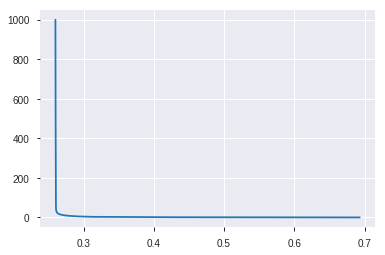

In [33]:
import matplotlib as mt
plt.plot(Jval,list(range(len(Jval))))

## Applying test Data on the Generated Model

In [34]:
test_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
27257,56,7,1,3,1,2,0,0,7,0,72,1,999,0,1,-0.1,93.200,-42.0
11742,33,9,2,5,0,0,2,1,4,0,241,3,999,0,1,1.4,94.465,-41.8
10889,35,9,1,5,0,0,0,1,4,4,417,1,999,0,1,1.4,94.465,-41.8
16359,44,1,1,0,1,0,0,0,3,4,71,3,999,0,1,1.4,93.918,-42.7
24576,42,9,1,2,0,0,0,0,7,1,295,1,999,0,1,-0.1,93.200,-42.0


In [35]:
tsd=test_num.iloc[:,:].T #test data
tsd

,27257,11742,10889,16359,24576,7750,35661,31640,18704,13727,...,13656,40865,32714,11563,28334,35446,25970,29245,37139,38960
age,56.0,33.000,35.000,44.000,42.0,36.000,34.000,52.000,38.000,42.000,...,39.000,40.000,51.000,31.000,46.000,42.000,49.0,30.000,24.000,76.000
job,7.0,9.000,9.000,1.000,9.0,3.000,0.000,2.000,1.000,1.000,...,1.000,9.000,2.000,1.000,1.000,4.000,4.0,9.000,8.000,5.000
marital,1.0,2.000,1.000,1.000,1.0,1.000,1.000,1.000,2.000,1.000,...,1.000,1.000,1.000,2.000,0.000,0.000,1.0,2.000,2.000,1.000
education,3.0,5.000,5.000,0.000,2.0,1.000,6.000,3.000,1.000,2.000,...,6.000,5.000,5.000,2.000,2.000,6.000,6.0,5.000,3.000,6.000
default,1.0,0.000,0.000,1.000,0.0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,1.000,0.000,0.000,0.0,0.000,0.000,0.000
housing,2.0,0.000,0.000,0.000,0.0,2.000,0.000,2.000,0.000,2.000,...,2.000,2.000,0.000,0.000,0.000,0.000,0.0,0.000,2.000,2.000
loan,0.0,2.000,0.000,0.000,0.0,0.000,2.000,0.000,0.000,0.000,...,0.000,0.000,0.000,2.000,0.000,0.000,0.0,0.000,0.000,0.000
contact,0.0,1.000,1.000,0.000,0.0,1.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,1.000,0.000,0.000,0.0,0.000,0.000,0.000
month,7.0,4.000,4.000,3.000,7.0,6.000,6.000,6.000,3.000,3.000,...,3.000,8.000,6.000,4.000,0.000,6.000,7.0,0.000,1.000,2.000
day_of_week,0.0,0.000,4.000,4.000,1.0,0.000,1.000,2.000,2.000,2.000,...,2.000,3.000,1.000,0.000,4.000,1.000,4.0,0.000,3.000,4.000


In [36]:
Xtest=[]
col=tsd.shape[0]
for i in range(col):
    Xtest.append(tsd.iloc[i].values)
Xtest.append(np.ones(tsd.shape[1]))
Xtest=np.array(Xtest)
Xtest.T.shape

(8238, 19)

In [37]:
out=sigmoid(Xtest.T@theta.T)
out

matrix([[0.03403096],
        [0.06265248],
        [0.11459307],
        ...,
        [0.03443289],
        [0.03606487],
        [0.06673178]])

In [38]:
def predictY(x,theta):
    out=sigmoid(x.T@theta.T)
    yout=np.zeros(len(out))
    for i in range(len(out)):
        if(out[i]<=0.5):
            yout[i]=0
        else:
            yout[i]=1
    return(yout)

In [39]:
finalout=predictY(Xtest,theta)
finalout

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
ytest_num.head()

,y
27257,0
11742,0
10889,0
16359,0
24576,0


### Applying Sklearn Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression().fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

In [42]:
ypredLR=modelLR.predict(test_num)

## Classification Metrics for sklearn LR

In [43]:
target_names = ['No', 'Yes']
print(classification_report(ytest_num, ypredLR, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95      7270
         Yes       0.66      0.36      0.47       968

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [44]:
out.shape

(8238, 1)

## Classification Metrics for self developed LR

In [45]:
print(classification_report(ytest_num, finalout, target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95      7270
         Yes       0.66      0.35      0.46       968

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.79      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



## APPLYING DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtclf=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [48]:
dtclf.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## Applying model on test

In [49]:
ypredDT=dtclf.predict(test_num)

## Classification Metrics for Decision Tree Classifier

In [50]:
print(classification_report(ytest_num,ypredDT,target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.94      0.94      7270
         Yes       0.52      0.52      0.52       968

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238




## APPLYING NAIVE BAYES

In [51]:
gnb=GaussianNB()
gnb.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

GaussianNB(priors=None, var_smoothing=1e-09)

### Applying Model on Test

In [52]:
y_predNB=gnb.predict(test_num)

## Classification Metrics for Naive Bayes

In [53]:
print(classification_report(ytest_num,y_predNB,target_names= target_names))

              precision    recall  f1-score   support

          No       0.93      0.89      0.91      7270
         Yes       0.39      0.50      0.44       968

   micro avg       0.85      0.85      0.85      8238
   macro avg       0.66      0.70      0.67      8238
weighted avg       0.87      0.85      0.86      8238



# MLP CLASSIFIER

In [54]:
mlpclf=MLPClassifier()

In [55]:
mlpclf.fit(train_num.iloc[:,:-1],train_num.iloc[:,-1:])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Predicting Test

In [56]:
ypredMLP=mlpclf.predict(test_num)

## Classification Metrics for MLP Classifier

In [57]:
print(classification_report(ytest_num,ypredMLP,target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95      7270
         Yes       0.61      0.52      0.56       968

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.77      0.74      0.75      8238
weighted avg       0.90      0.90      0.90      8238



## Accuracy scores

### Self developed Logistic Regression

In [58]:
accuracy_score(ytest_num,finalout)

0.9024034959941734

### sklearn Logistic Regression

In [59]:
accuracy_score(ytest_num,ypredLR)

0.9031318281136198

### Naive Bayes' Classifier

In [60]:
accuracy_score(ytest_num,y_predNB)

0.8480213644088371

### Decision Tree Classifier

In [61]:
accuracy_score(ytest_num,ypredDT)

0.887836853605244

### MLP Classifier

In [62]:
accuracy_score(ytest_num,ypredMLP)

0.9047098810390871

# ROC CURVES

### Self-Implemented Logistic Regression

In [63]:
fpr, tpr, thresholds = roc_curve(ytest_num,out)

In [64]:
fpr,tpr

(array([0.00000000e+00, 1.37551582e-04, 1.37551582e-04, ...,
        8.14442916e-01, 8.14442916e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00206612, ..., 0.99896694, 1.        ,
        1.        ]))

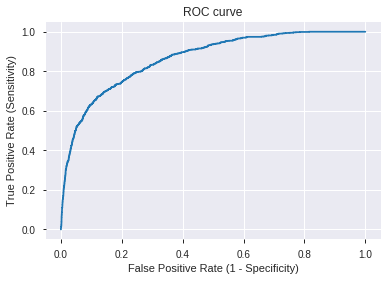

In [65]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [66]:
roc_auc_score(ytest_num,out)

0.8649635658826605

### sklearn Logistic Regression

In [67]:
probLR=modelLR.predict_proba(test_num)[:,1]
probLR

array([0.01572259, 0.01702242, 0.04729623, ..., 0.07542146, 0.20849076,
       0.48347733])

In [68]:
fpr_lr, tpr_lr, thresholds = roc_curve(ytest_num,probLR)

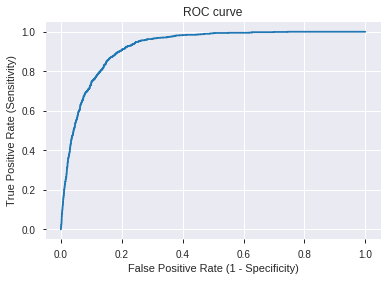

In [69]:
plt.plot(fpr_lr,tpr_lr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [70]:
roc_auc_score(ytest_num,probLR)

0.9229031909693407

### Naive Bayes' classifier

In [71]:
probNB=gnb.predict_proba(test_num)[:,1]

In [72]:
fpr_nb,tpr_nb, thresholds = roc_curve(ytest_num,probNB)

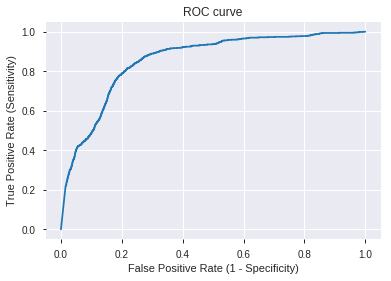

In [73]:
plt.plot(fpr_nb, tpr_nb)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [74]:
roc_auc_score(ytest_num,probNB)

0.8564239999090568

### Decision Tree classifier

In [75]:
probDT=dtclf.predict_proba(test_num)[:,1]
probDT

array([0., 0., 0., ..., 0., 0., 1.])

In [76]:
fpr_dt,tpr_dt, thresholds = roc_curve(ytest_num,probDT)

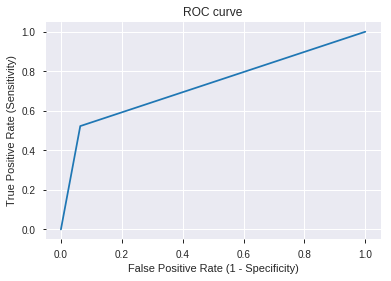

In [77]:
plt.plot(fpr_dt,tpr_dt)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [78]:
roc_auc_score(ytest_num,probDT)

0.7295892209578592

### MLP Classifier

In [79]:
probMLP=mlpclf.predict_proba(test_num)[:,1]
probMLP

array([0.00084727, 0.00620311, 0.02328258, ..., 0.0229609 , 0.16988259,
       0.8049912 ])

In [80]:
fpr_mlp,tpr_mlp, thresholds = roc_curve(ytest_num,probMLP)

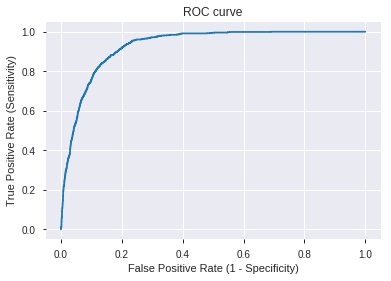

In [81]:
plt.plot(fpr_mlp,tpr_mlp)
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [82]:
roc_auc_score(ytest_num,probMLP)

0.9286014926051815

## Comparison of all models on Test Data

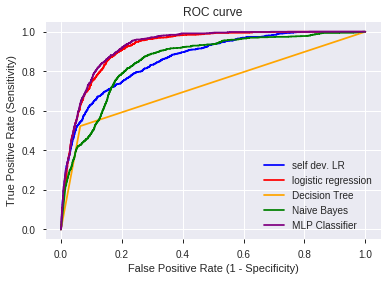

In [83]:
plt.plot(fpr,tpr,color='blue',label='self dev. LR') #self developed
plt.plot(fpr_lr,tpr_lr,color='red',label='logistic regression') #lr
plt.plot(fpr_dt,tpr_dt,color='orange',label='Decision Tree') #DT
plt.plot(fpr_nb,tpr_nb,color='green',label='Naive Bayes') #naivebayes
plt.plot(fpr_mlp,tpr_mlp,color='purple',label='MLP Classifier') #decisiontree
plt.legend(loc='lower right')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)